In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import pandas as pd
from mpl_toolkits.mplot3d import axes3d

In [3]:
df = pd.read_csv("xyz.csv")

In [4]:
df

,Longitud,Latitud,Profundidad
0,-94.61,15.14,23
1,-94.40,15.20,16
2,-94.66,15.37,18
3,-94.29,14.94,16
4,-94.34,15.10,19
...,...,...,...
945,-94.65,15.29,29
946,-94.64,15.24,13
947,-94.85,15.62,32
948,-94.11,14.85,58


In [5]:
x= df['Longitud']
y= df['Latitud']
z= df['Profundidad']

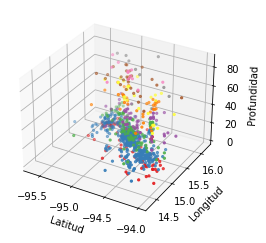

In [6]:
fig = plt.figure()

ax=fig.add_subplot(111, projection='3d')
ax.scatter3D(x,y,z, c=z, cmap='Set1', marker='.')
ax.set_xlabel('Latitud')
ax.set_ylabel('Longitud')
ax.set_zlabel('Profundidad')
plt.show()


In [7]:
y= df['Longitud']
x= df['Latitud']
z= df['Profundidad']

X=[]
Y=[]
Z=[]

i=0
for i in range(np.size(x)):
    X.append(x[i])
    Y.append(y[i])
    Z.append(z[i])

950

In [ ]:
def Fcost(theta,zobs,zpre):
    f=(1/2)*(len(zobs))*np.square()

In [ ]:
import sklearn

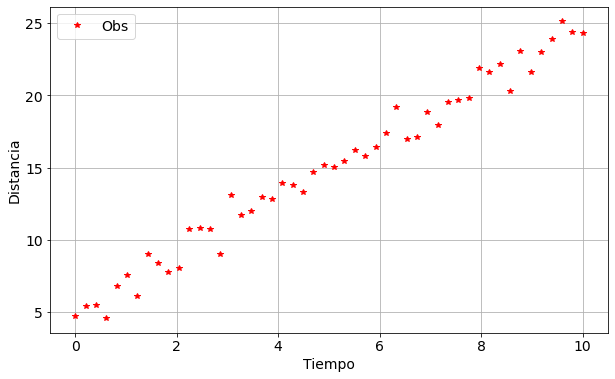

In [11]:
import numpy as np
import matplotlib.pylab as plt
import random as rd
from mpl_toolkits import mplot3d


#Función de costo alternativa
def cost_function(theta,yobs,ypre):
    f=(1/2*(len(yobs)))*np.sum(np.square(ypre-yobs))
    return f

#Función de costo como se definió anteriormente 
def cost_function2(theta,x_gd,ypre):
    predictions = x_gd.dot(theta)
    f=(1/2*(len(ypre)))*np.sum(np.square(predictions-ypre))
    return f

#Recuerden que esta será la partida del modelo, se debe ser cuidadoso con este valor. 
[the0,the1]=[2,5]

#Variable independiente
x_vect=np.linspace(0,10,50)
y_vect=0*x_vect
for ii in range(len(x_vect)):
    y_vect[ii]=(the0*x_vect[ii])+the1+np.random.randn(1,1)

#Generado el vector de X_{j}^{i}    
x_gd=np.c_[x_vect,np.ones((len(x_vect),1))]

plt.figure(figsize=(10,6))
plt.plot(x_vect,y_vect,'r*',label='Obs')
plt.legend(fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid(True)
plt.ylabel('Distancia',fontsize=14)
plt.xlabel('Tiempo',fontsize=14)
plt.show()

In [12]:
def desc_grad(theta,x_gd,y_vect,alpha,iteraciones):
    
    m=len(y_vect) #Número de datos
    
    
    theta_history=np.zeros((iteraciones,len(theta))) #Valores que tendrán los parámetros por cada iteración
    costo1=np.zeros(iteraciones) #Función de costo definida
    costo2=np.zeros(iteraciones) #Función de costo RMS -- Todos los errores valen lo mismo, no importa si son outliers

    for ii in range(iteraciones):                      
        prediccion=np.dot(x_gd,theta) # y=mx+b
        theta[:,0]=theta[:,0]-(alpha*(1/m)*x_gd.T.dot((prediccion[:,0]-y_vect))) #Descenso del gradiente               
        theta_history[ii,:]=theta.T #Almacenar el vector de parámetros por iteración
        costo1[ii]=cost_function(theta[:,0],y_vect,prediccion) #Guardar el valor de la función de costo 1
        costo2[ii]=cost_function2(theta[:,0],x_gd,y_vect) #Guardar el valor de la función de costo 2

    return theta, theta_history, costo1, costo2

thetai=np.array([[1.8],[3.8]]) #np.random.randn(2,1) #Ustedes lo pueden definir
niter=1000
theta, theta_history, costo1, costo2=desc_grad(thetai,x_gd,y_vect,0.001,niter)

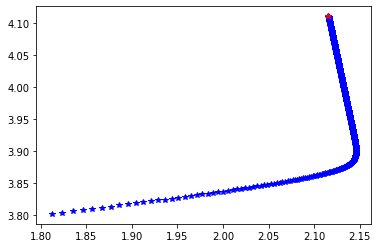

In [13]:
plt.figure()
plt.plot(theta_history[:,0],theta_history[:,1],'b*')
plt.plot(theta[0][0],theta[1][0],'r*')
plt.show()

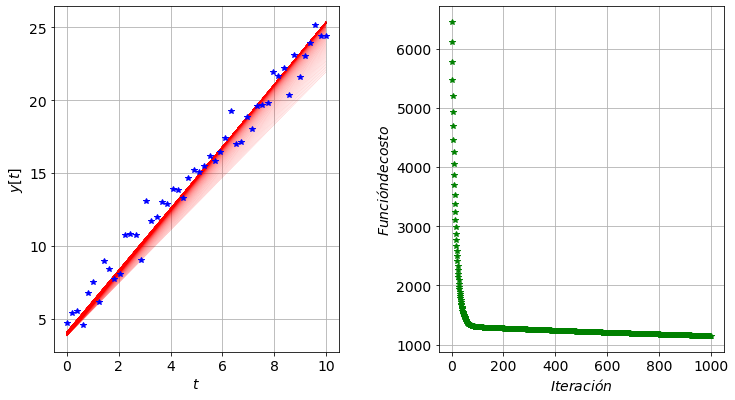

In [14]:
plt.figure(figsize=(12,6))
plt.subplot(121)

def ypre(X,theta_history):
    ypredic=(theta_history[1]*X)+theta_history[0]
    return ypredic

X_vt=x_vect
X_b=x_gd
y_vt=y_vect
for ii in range(len(theta_history)):
    plt.plot(x_vect,x_gd.dot(theta_history[ii,:]),'r',lw=0.1)
plt.plot(X_vt,y_vt,'b*')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel(r'$t$',fontsize=14)
plt.ylabel(r'$y[t]$',fontsize=14)
plt.grid(True)

plt.subplot(122)
plt.plot(np.linspace(0,niter,niter),costo2,'g*')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel(r'$Iteración$',fontsize=14)
plt.ylabel(r'$Función de costo$',fontsize=14)
plt.grid(True)
plt.subplots_adjust(left=0.125,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.35, 
                    hspace=0.35)
plt.show()